In [16]:
import clustertools as ctools
import numpy as np
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014

# Orbits and Tidal Tails

For cases where the external tidal field and a cluster's galactocentric position and velocity are known, it is possible to calculate additional cluster properties based on their orbit. As discussed in the documentation, this part of ``clustertools`` makes significant use of ``galpy`` (Bovy J., 2015, ApJS, 216, 29). In fact, several ``clustertools``  functions are simply wrappers of ``galpy`` functions that are setup to work with the ``StarCluster`` class.

To begin, lets load the final snapshot of an N-body simulation that was meant to reproduce the Galactic globular cluster Pal 5. Note one could have used ``setup_cluster`` to generate a Pal 5 - like cluster, but it would not have any tidal tails (which will also be discussed here). By default, the external tidal field is assumed to be equal to the ``MWPotential2014`` model from Bovy (2015). For all types of orbit analysis, this can be replaced with a different ``galpy`` potential using the ``pot`` variable.


0

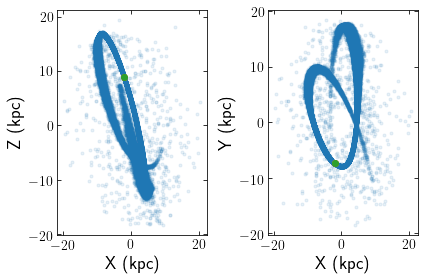

In [2]:
cluster = ctools.load_cluster('snapshot',filename='pal5.dat', units='kpckms',origin='galaxy')
ctools.starplot(cluster)

If you wish to extract the orbit of the cluster as a ``galpy`` orbit to analyze within ``galpy``, simply initialize the orbit via:

In [3]:
cluster.initialize_orbit()

After the above step, ``cluster.orbit`` now contains the ``galpy`` orbit. You can also integrate the orbit forwards to ``tfinal`` Gyr, with the option to do the standard ``galpy`` orbit plot. For illustrative purposes, I have shown how the ``pot`` variable can be used to specify the background potential.

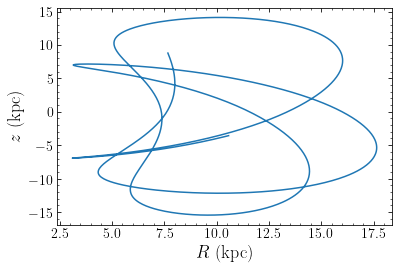

In [15]:
cluster.integrate_orbit(tfinal=1.,plot=True, pot=MWPotential2014)

If instead you wish to extract that orbital path +/- ``dt`` Gyr from the cluster's current position, you can run the below command which also has a plot option. Note the default ``dt`` is 0.1 Gyr, but for this particular snapshot a ``dt`` of 0.3 Gyr is needed to approximately cover the length of the tails.

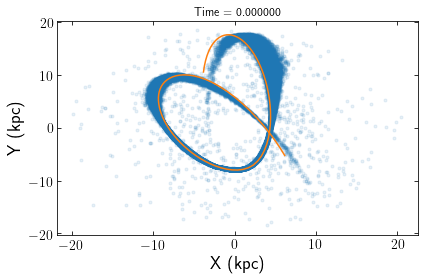

In [5]:
t,x,y,z,vx,vy,vz=cluster.orbital_path(plot=True,dt=0.3)

A related feature implemented in ``clustertools`` is the ability to find the distance of each star from the stream path (``dpath``) and its distance along the stream path from the progenitor (``dprog``). When calling ``orbital_path_match``, the timestep along the orbital path that each star is closest to is also returned (``tpath``).

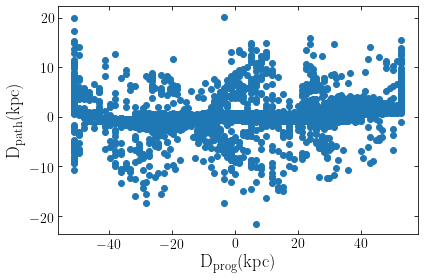

In [6]:
t,dprog,dpath=cluster.orbital_path_match(plot=True,dt=0.3)

It is also possible to calculate the orbit actions associated with the progenitor using ``calc_actions``. If ``full=True``, then the orbital frequencies and periods are also returned. The variables are also stored in ``cluster.JR``,``cluster.Jphi``, etc.

In [7]:
JR, Jphi, Jz, OR, Ophi, Oz, TR, Tphi, Tz=cluster.calc_actions(full=True)

In [8]:
cluster.ttensor()

array([[ -1.56096708e-04,   4.80066091e-05,  -5.72048702e-05],
       [  4.80066091e-05,   7.06741334e-06,  -2.10009191e-04],
       [ -5.72048702e-05,  -2.10009191e-04,   8.10771929e-05]])

In [9]:
cluster.ttensor(eigenval=True)

array([ 0.00027039, -0.00016917, -0.00016917])

0

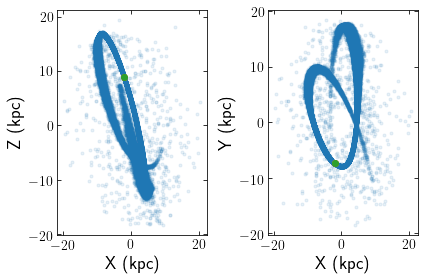

In [10]:
ctools.starplot(cluster)

Orbit Interpolation

In [11]:
#Move cluster 1 Gyr ahead in time. Define tails as anything 100 pc from centre of cluster. Non tail stars move with cluster centr.
cluster.orbit_interpolate(1.0,do_tails=True,rmax=0.1)


0

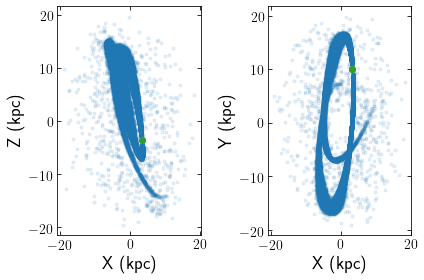

In [12]:
ctools.starplot(cluster)

Tails

In [13]:
cluster = ctools.load_cluster('snapshot',filename='pal5.dat', units='kpckms',origin='galaxy')


AttributeError: 'Line2D' object has no property 'coord'

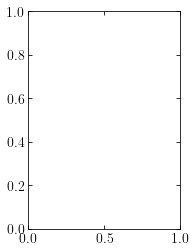

In [14]:
cluster.tail_path(plot=True)

In [ ]:
cluster.tail_path_match(plot=True,dt=0.3)